<a href="https://colab.research.google.com/github/harkpun/Netflix-Movie-and-TV-Shows-Clustering/blob/main/Netflix_Movie_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title - Netflix Movie and TV Shows Clustering </u></b>

##### **Project Type**    - Unsupervised (Clustering, Content Based Recommendation System)

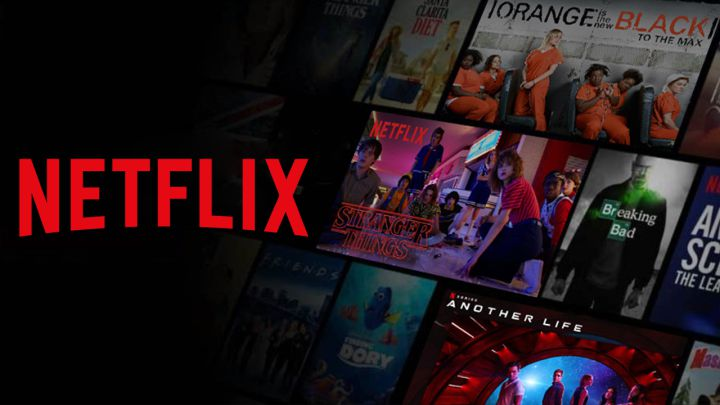



# **GitHub Link**


https://github.com/harkpun/Netflix-Movie-and-TV-Shows-Clustering

# **Index:**

1. Problem statement
2. Importing the libraries and the dataset
3. Understanding data
4. Exploratory data analysis
5. Data Cleaning
6. Textual Data preprocessing
7. Clusters impelementation
8. Build Content Based Recommendation System.
9. Conclusions

# **Let's Begin !**

##**1. Problem Statement**
<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

<b>Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

<b>We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

<b>The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


## **2. Know Your Data**

#### Import Libraries

In [1]:
# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/harkpun/Netflix-Movie-and-TV-Shows-Clustering/main/Data/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv')

In [3]:
# top 5 rows
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
# last 5 rows
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Size of dataset

In [5]:
# Dataset Rows & Columns count
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Unique values

In [6]:
# unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

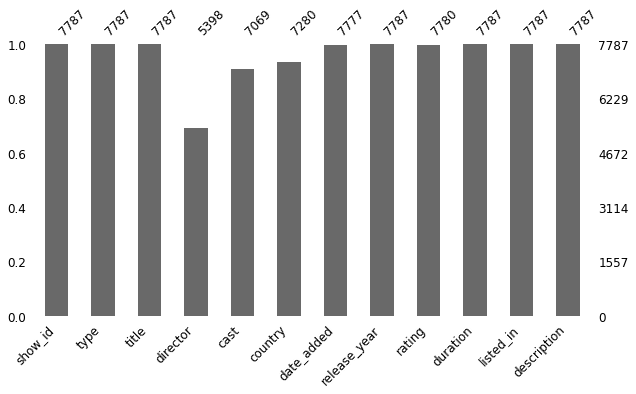

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12)

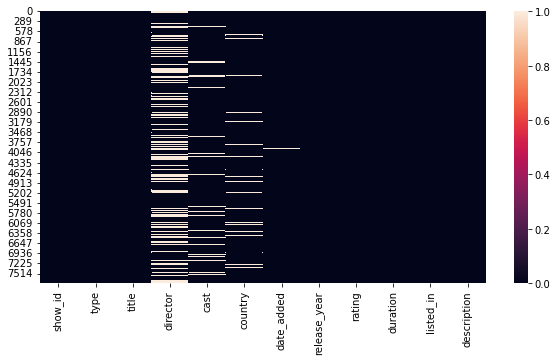

In [12]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isna())

NaN values present in the director, cast, country, date_added and rating column. 

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty string in below procedure analyzing each columns.

## **3. Understanding Attributes**

### **Attribute Information**
- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Attributes name

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Statistical Summary

In [14]:
# Dataset Describe
df.describe(include='all').transpose()

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   A surly septuagenarian gets another chance at ...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Counting unique value

In [15]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'number of unique values in {i} column : {df[i].nunique()}    \nunique values :\n{df[i].unique()}')
  print('='*150)

number of unique values in show_id column : 7787    
unique values :
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
number of unique values in type column : 2    
unique values :
['TV Show' 'Movie']
number of unique values in title column : 7787    
unique values :
['3%' '07:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
number of unique values in director column : 4049    
unique values :
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
number of unique values in cast column : 6831    
unique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, S

- **After analysing dataset our most of the focus toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' these columns.**
- **We are building our model on the top of these features where those feature are used to create one cluster column to implement K-means, Heirachical clustering and building content based recommandation system as well.**

## **4. EDA**

#### **4.1. Type column**

In [16]:
# number of unique values
df['type'].nunique()

2

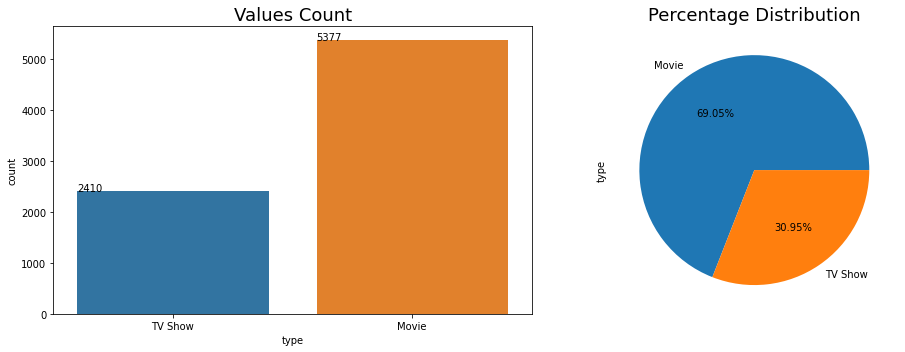

In [17]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# coutplot
graph = sns.countplot(x=df['type'], ax=ax[0])
graph.set_title('Values Count', size=18)
# adding value count on the top of bar
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()

**Obesrvation:** 69% of data belong from Movie class and 31% of data belong from TV shows 

#### **4.2. Title column**

In [18]:
df['title'].nunique()

7787

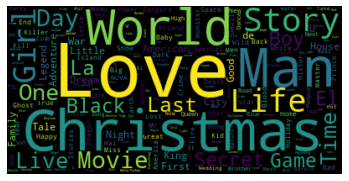

In [19]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Obesrvation:** word like Christmas, Love, World, Man, Story are very comman word which are appear most of the time in movie title column.

#### **4.3 Director column**

In [20]:
print(f'number of unique classes : {df.director.nunique()}')
print(f'counting null value : {df.director.isna().sum()}')

number of unique classes : 4049
counting null value : 2389


In [21]:
print(f"number of movie directed by director is : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"number of TV show directed by director is : { df[df['type']=='Movie']['director'].value_counts().sum()}")

number of movie directed by director is : 184
number of TV show directed by director is : 5214


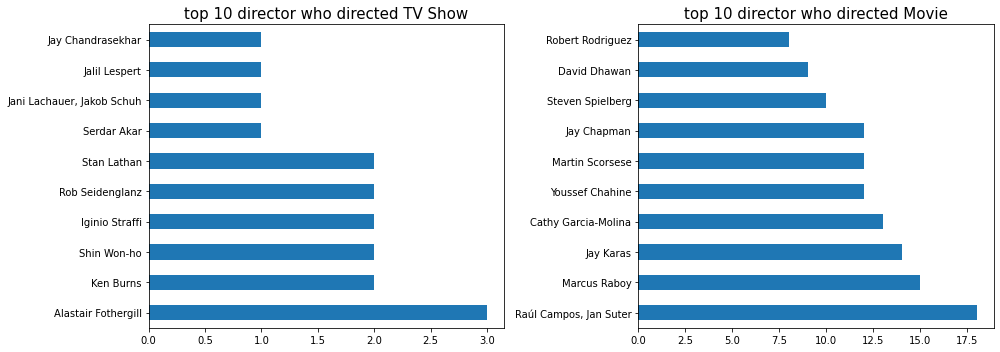

In [22]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()

**Obesrvation:**  
1. Alstair Fothergill directed highest shows in datalist which is 3.
2. Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the dataset.

#### **4.4 Cast column**

In [23]:
# seperating actor from cast column
cast = df['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [24]:
print(f"number of TV Shows actor : {len(df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
print(f"number of Movie actor : {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")

number of TV Shows actor : 13585
number of Movie actor : 23049


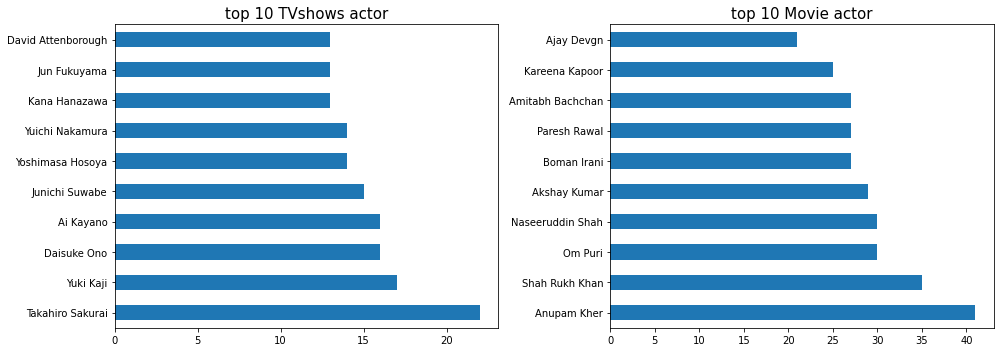

In [25]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('top 10 TVshows actor', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('top 10 Movie actor', size=15)

plt.tight_layout()
plt.show()

**Observation :**
1. Anupam Kher, Shahrukh Khan, Om Puri play highest number of role in the movies.
2. Takahiro Sakurai, Yuki Kaji, Daisuke Ono play highest role in the TV shows.

#### **4.5 Country column**

In [26]:
df['country'].nunique()

681

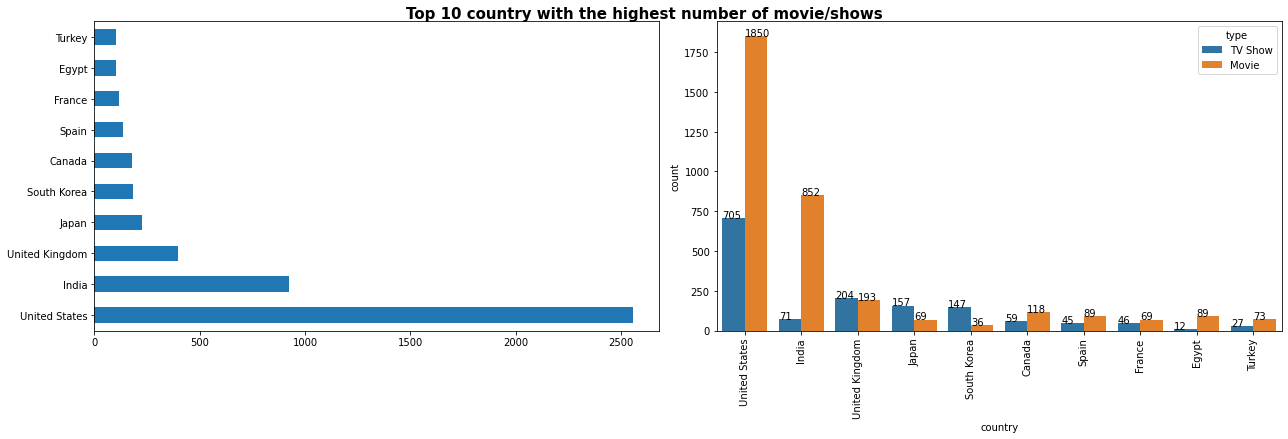

In [27]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0]) #sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Observation :** The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [28]:
# % share of movies / tv shows by top 10 countries
df['country'].value_counts().nlargest(10).sum()/len(df)*100

63.06664954411198

- The top 10 countries together account for about 63% of all movies and TV shows in the dataset.

#### **4.6 Release_Year column**

In [29]:
# number of unique values
df['release_year'].nunique()

73

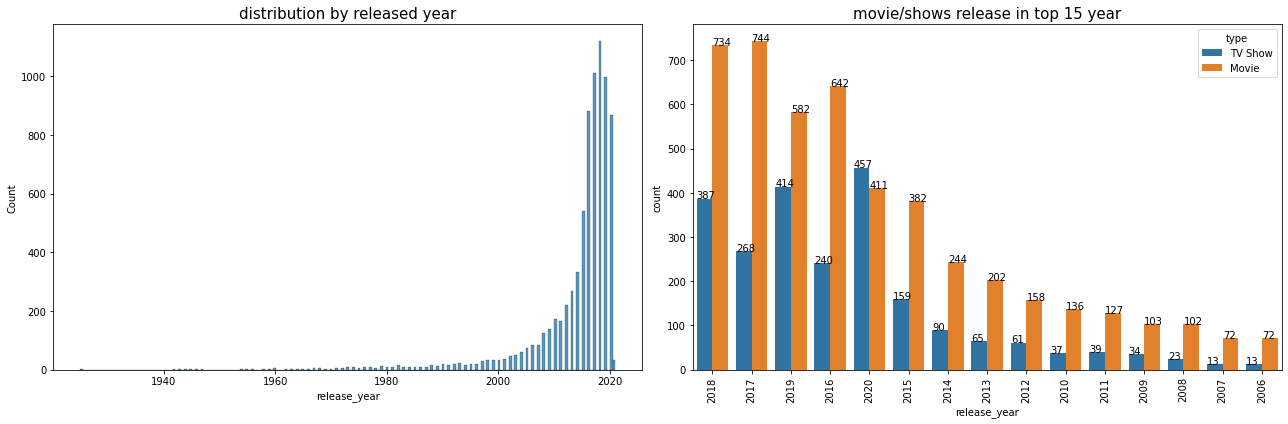

In [30]:
fig,ax = plt.subplots(1,2, figsize=(18,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('movie/shows release in top 15 year', size=15)
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Obesrvation :** 
1. Netflix has greater number of new movies / TV shows than the old ones.
2. Highest number of movie/shows are relesed in netflix in between 2015-2020 and highest number of count belong from 2018 year.

#### **4.7 Rating column**

In [31]:
# number of unique values
df.rating.nunique()

14

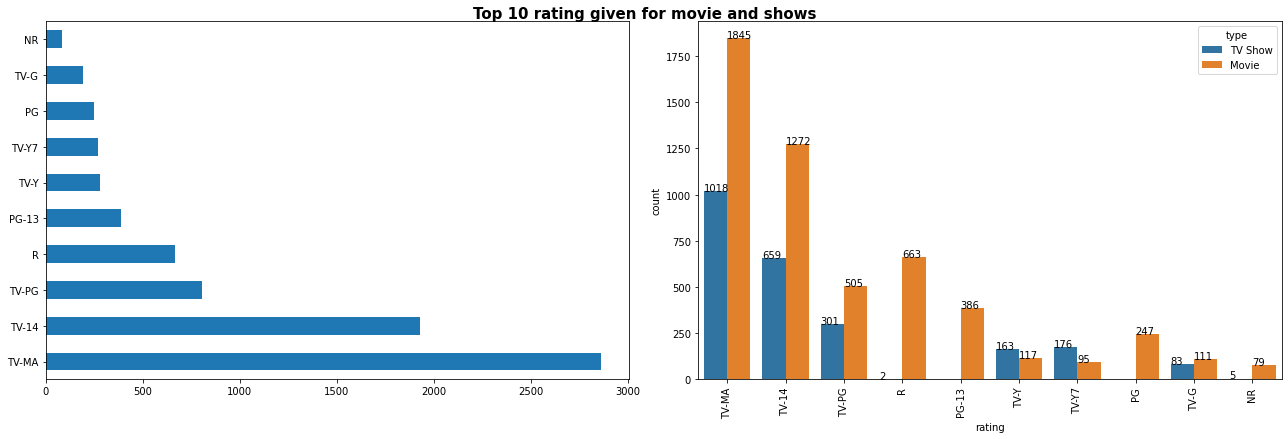

In [32]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', size=15, y=1.01)

# univariate analysis
df.rating.value_counts()[:10].plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Obesrvation**: Most of the movie/shows have rating of TV-MA (mature audiance) then followed by TV-14 (younger audience)


#### **4.8 Listed_In column (Gener)**

In [33]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

genre  count
0      International Movies   2437
1                    Dramas   2106
2                  Comedies   1471
3    International TV Shows   1199
4             Documentaries    786
5        Action & Adventure    721
6                 TV Dramas    704
7        Independent Movies    673
8  Children & Family Movies    532
9           Romantic Movies    531

In [34]:
# number of genres present in dataset 
len(genres)

42

In [35]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres)
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

**Obesrvation :** Highest number of genre belong from International movies, Dramas, Comedies respectively.

#### **4.9 Description**

In [36]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation :** Most of the comman words present in description column are family, find, life, love, new, world, friend.

## **5. Data Cleaning**

### **5.1. Duplicate Values**

In [37]:
# counting duplicate values
df.duplicated().sum()

0

### **5.2. Handling Missing Values**

In [38]:
# Missing Data %
round(df.isna().sum()/len(df)*100, 2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

- The missing values in the director, cast, and country attributes can be replaced with 'empty string'
- Small amount of null value percentage present in rating and date_added column, if we drop these nan values it will not affect that much while building the model. So, we simply drop the nan value present in rating and date_added columns.

In [39]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [40]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### **5.3. Handling Outlier**

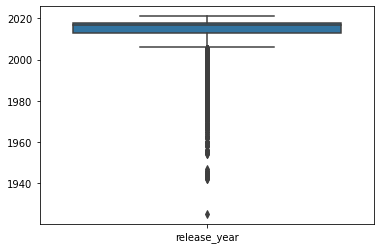

In [41]:
# boxplot for outlier detection
sns.boxplot(data=df)

Since the almost all of the data present in textual format Except release year and also the data that we need to create cluster are present in textual foramat. So, there is no need to perform handling outlier.

## **6. Textual Data Preprocessing**


**Modeling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.


#### **6.1. Clustering Attributes**
We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [42]:
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

In [43]:
df.tags[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

- We have successfully added all the necessary data into a single column.

####**6.2. Removing Stopwords and Lower Casing.**

In [44]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [45]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [46]:
# applying stopwords function.
df['tags'] = df['tags'].apply(stopwords)

In [47]:
df.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

- We have successfully removed all the stopwords and converted the corpus to lowercase.

#### **6.3. Removing Punctuations**

In [48]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [49]:
# applying remove_punctuation function
df['tags'] = df['tags'].apply(remove_punctuation)

In [50]:
df.tags[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

- We have successfully remove all the punctuation marks from the corpus.

#### **6.4. Stemming**
Used SnowballStemmerto generate a meaningful word out of corpus of words.

In [51]:
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [52]:
# appying stemming function
df['tags'] = df['tags'].apply(stemming)

In [53]:
df.tags[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

- We have stemming the corpus.

#### **6.5. Text Vectorization**

We can vectorize the corpus using **TFIDF vectorizer**, where TFIDF stands for - **Term Frequency Inverse Document Frequency**.

### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

### IDF(t) = $log_e(\frac{Total\  number \ of \ documents}{ Number \  of \ documents \  with \  term \ t \ in \ it })$

In [54]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [55]:
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000

10000


In [56]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


#### **6.6. Dimesionality Reduction**
We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [57]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

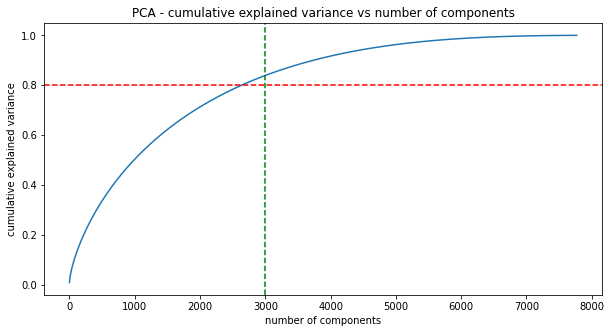

In [58]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

- We find that 100% of the variance is explained by about ~7500 components.
- Also, more than 80% of the variance is explained just by 3000 components.
- Hence to simplify the model, and reduce dimensionality, we can take the top 3000 components, which will still be able to capture more than 80% of variance.

In [59]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [60]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

## **7. Clusters implementation**

### **7.1. K-Means Clustering**


Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

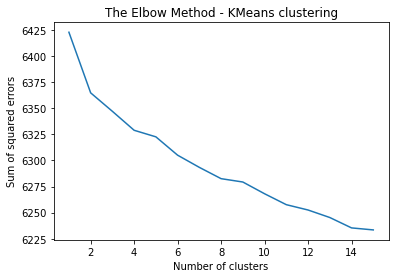

In [61]:
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

- **The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.**

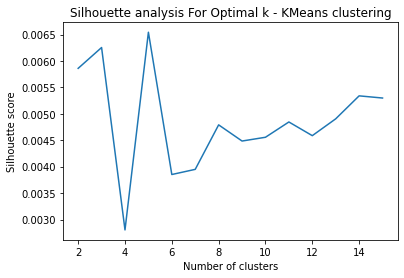

In [62]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

- **The highest Silhouette score is obtained for 5 clusters.**

Building 5 clusters using the k-means clustering algorithm:

In [63]:
# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=33)

In [64]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6323.339287025132, 0.007202543813855989)


In [65]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [66]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                         title                     director  \
7339  Movie                Under The Skin              Jonathan Glazer   
2598  Movie                       Hangman                Johnny Martin   
915   Movie  Bikram: Yogi, Guru, Predator                    Eva Orner   
5664  Movie    Sleeping with Other People              Leslye Headland   
2225  Movie                     For Grace  Mark Helenowski, Kevin Pang   

                                                   cast  \
7339  Scarlett Johansson, Krystof Hádek, Jeremy McWi...   
2598  Al Pacino, Karl Urban, Brittany Snow, Joe Ande...   
915                                    Bikram Choudhury   
5664  Jason Sudeikis, Alison Brie, Adam Scott, Jason...   
2225                                                      

                                         country rating  \
7339  Switzerland, United Kingdom, United States      R   
2598                               United States      R   
915                                United States  TV-MA   
5664                               United States      R   
2225                               United States  TV-PG   

                                             listed_in  \
7339  Dramas, Independent Movies, International Movies   
2598                                         Thrillers   
915                                      Documentaries   
5664              Comedies, Dramas, Independent Movies   
2225                                     Documentaries   

                                            description  kmeans_cluster  
7339  A seductive alien prowls the streets in search...               1  
2598  A homicide detective, a criminal profiler and ...               1  
915   This documentary charts the rise and fall of h...               0  
5664  Many years after hooking up in college, two pe...               1  
2225  As chef Curtis Duffy oversees every aspect of ...               1

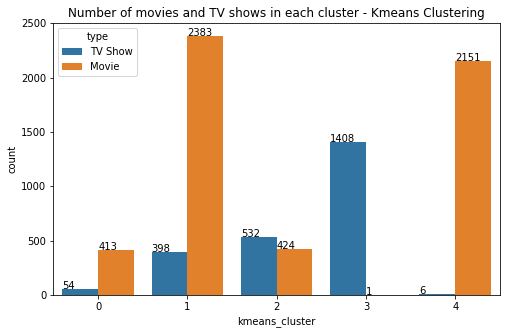

In [67]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

- **Successfully built 5 clusters using the k-means clustering algorithm.**

#### **Building wordclouds for different clusters in K-Means Clustering**

In [68]:
def kmeans_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

##### **Word Cloud on "description" column for different cluster**

cluster 0


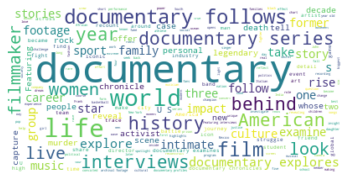

cluster 1


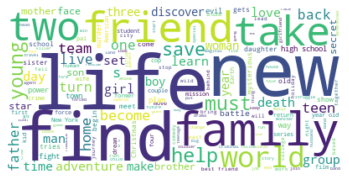

cluster 2


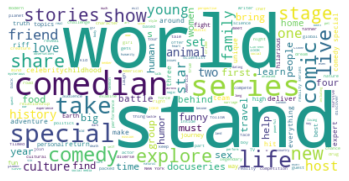

cluster 3


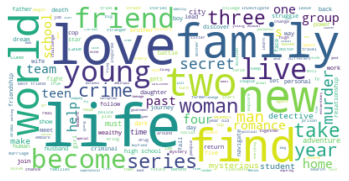

cluster 4


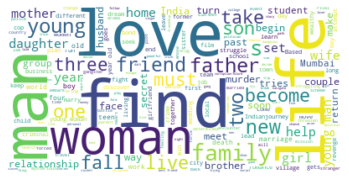

In [69]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

##### **Word Cloud on "cast" column for different cluster**

cluster 0


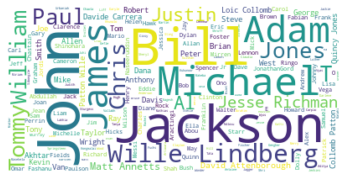

cluster 1


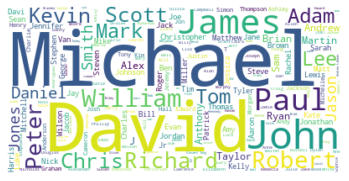

cluster 2


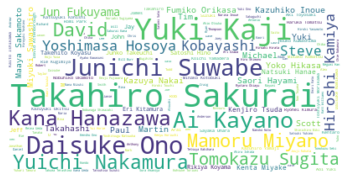

cluster 3


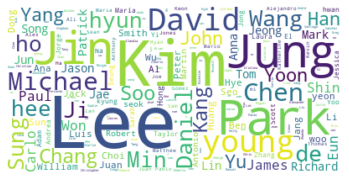

cluster 4


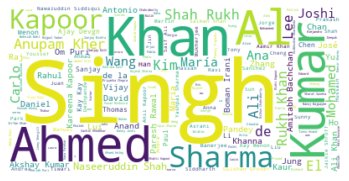

In [70]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

##### **Word Cloud on "director" column for different cluster**

cluster 0


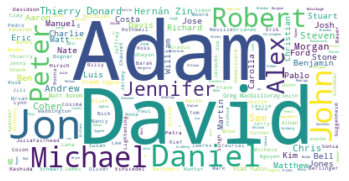

cluster 1


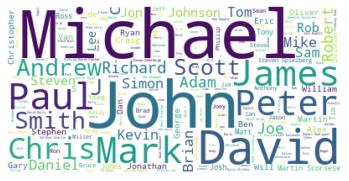

cluster 2


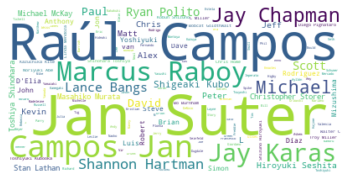

cluster 3


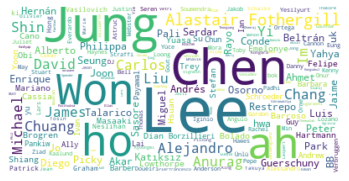

cluster 4


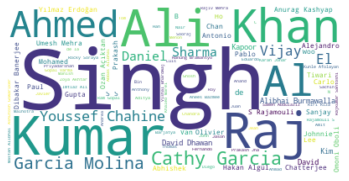

In [71]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

##### **Word Cloud on "listed_in" (genre) col for different cluster**

cluster 0


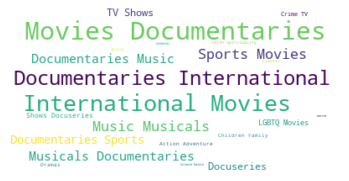

cluster 1


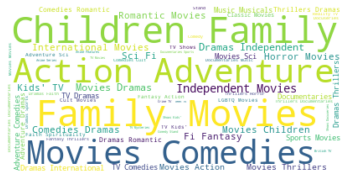

cluster 2


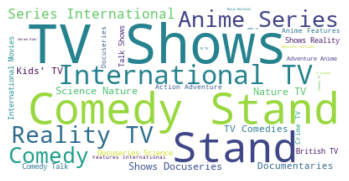

cluster 3


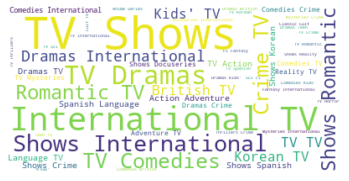

cluster 4


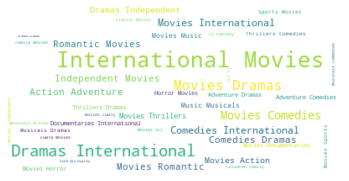

In [72]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

##### **Word Cloud on "country" column column for different cluster**

cluster 0


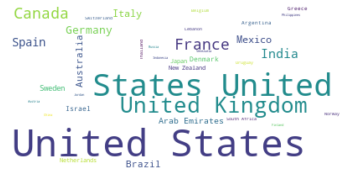

cluster 1


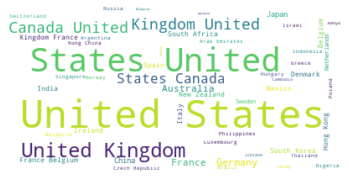

cluster 2


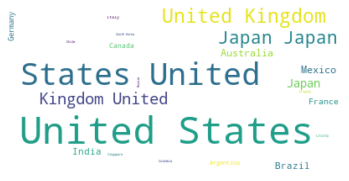

cluster 3


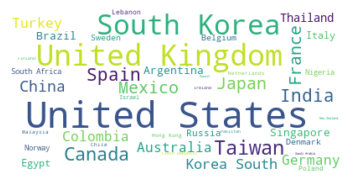

cluster 4


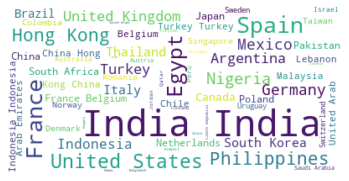

In [73]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

##### **Word Cloud on "title" column column for different cluster**

cluster 0


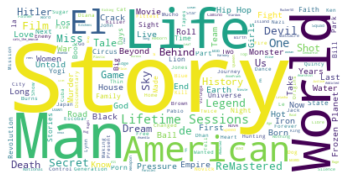

cluster 1


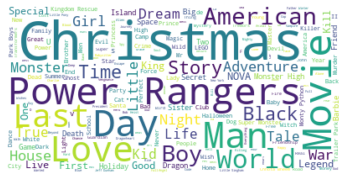

cluster 2


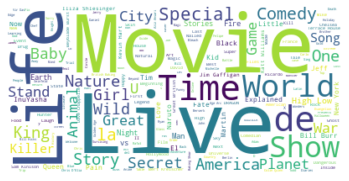

cluster 3


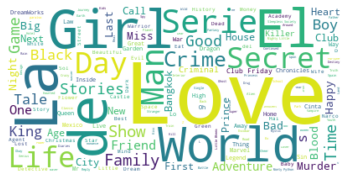

cluster 4


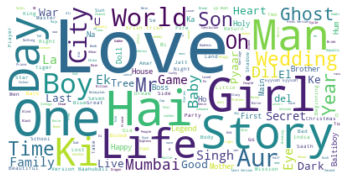

In [74]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

### **7.2. Hierarchical clustering**
Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

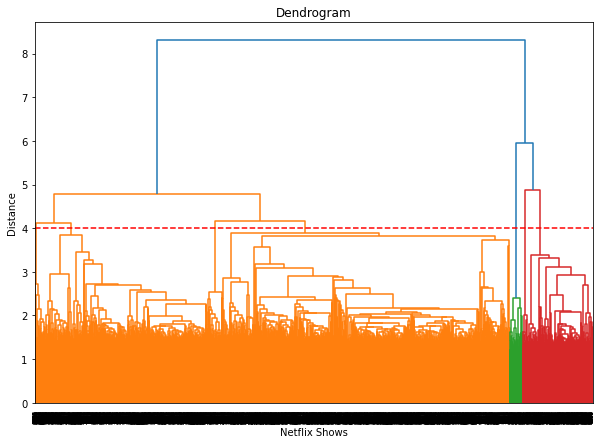

In [75]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

- **At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.**



Building 7 clusters using the Agglomerative clustering algorithm:

In [76]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

array([0, 0, 1, ..., 0, 4, 0])

In [77]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [78]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                            title                 director  \
7434  TV Show               ViR: The Robot Boy                            
391     Movie  Alias JJ, la celebridad del mal                            
7694    Movie                Y Tu Mamá También           Alfonso Cuarón   
5437    Movie                 Schubert In Love              Lars Büchel   
1984  TV Show       Ellen DeGeneres: Relatable  Joel Gallen, Tig Notaro   

                                                   cast        country rating  \
7434  Vidit Kumar, Roopa Bhimani, Anubhav Saha, Bria...                 TV-Y7   
391                                                                     TV-MA   
7694  Maribel Verdú, Gael García Bernal, Diego Luna,...         Mexico      R   
5437  Olaf Schubert, Mario Adorf, Marie Leuenberger,...        Germany  TV-14   
1984                                    Ellen DeGeneres  United States  TV-MA   

                                             listed_in  \
7434                                          Kids' TV   
391                Documentaries, International Movies   
7694  Dramas, Independent Movies, International Movies   
5437                    Comedies, International Movies   
1984         Stand-Up Comedy & Talk Shows, TV Comedies   

                                            description  hierarchical_cluster  
7434  Humanoid robot boy ViR lives with his inventor...                     0  
391   Witnesses and public figures respond to contro...                     0  
7694  When rich teens Tenoch and Julio meet the allu...                     4  
5437  The last of his family line, Olaf Schubert doe...                     0  
1984  In her first special since 2003, Ellen revisit...                     0

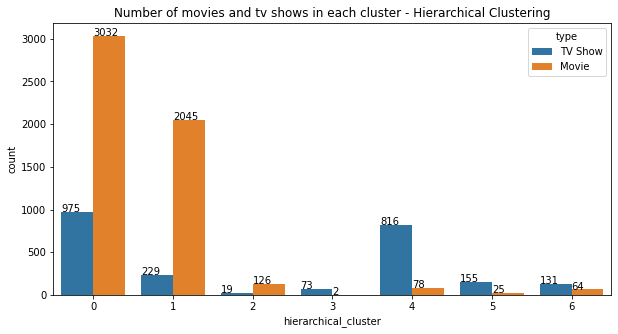

In [79]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

- Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

#### **Building wordclouds for different clusters in hierarchical Clustering**

In [80]:
def hierarchical_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

##### **Word Cloud on "title" column for different cluster**

cluster 0


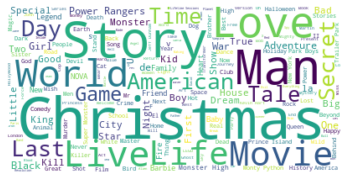

cluster 1


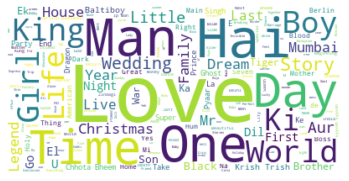

cluster 2


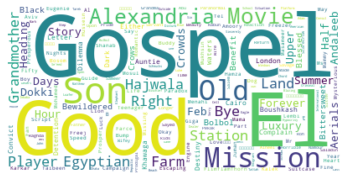

cluster 3


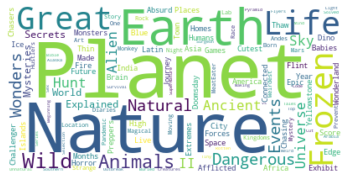

cluster 4


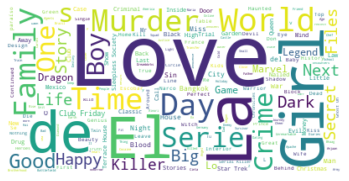

cluster 5


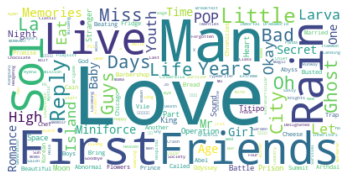

cluster 6


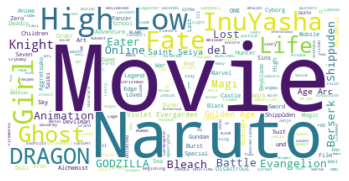

In [81]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

##### **Word Cloud on "description" column for different cluster**

cluster 0


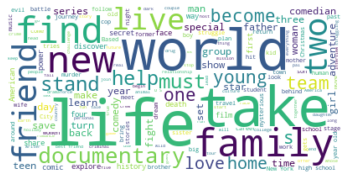

cluster 1


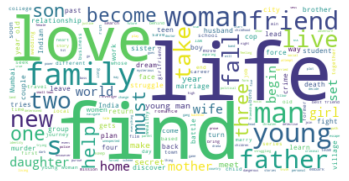

cluster 2


cluster 3


cluster 4


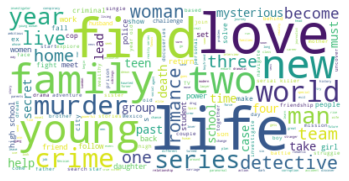

cluster 5


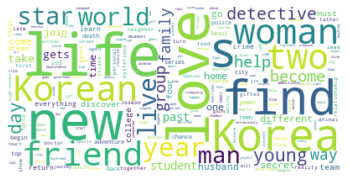

cluster 6


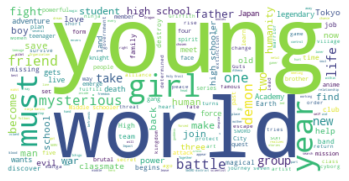

In [82]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

##### **Word Cloud on "cast" column for different cluster**

cluster 0


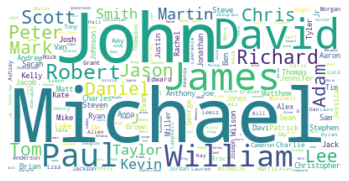

cluster 1


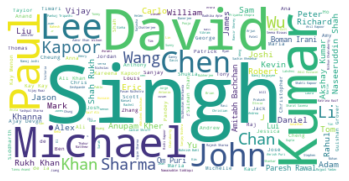

cluster 2


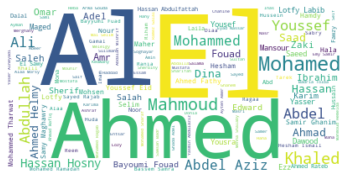

cluster 3


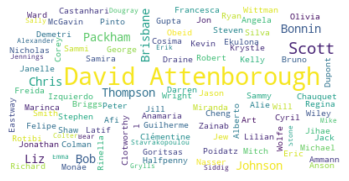

cluster 4


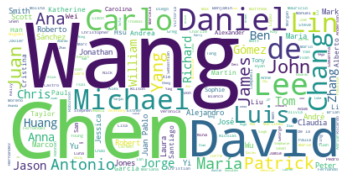

cluster 5


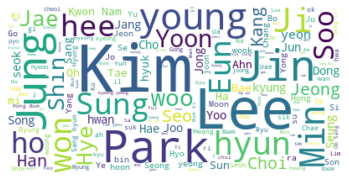

cluster 6


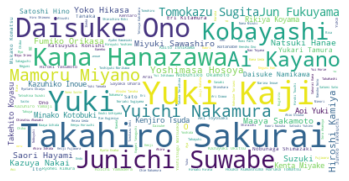

In [83]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

##### **Word Cloud on "country" column for different cluster**

cluster 0


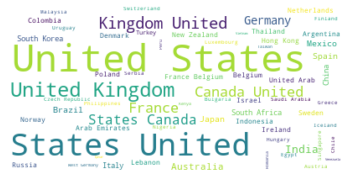

cluster 1


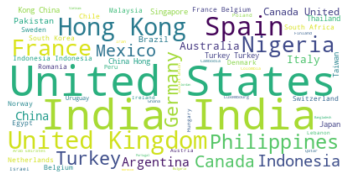

cluster 2


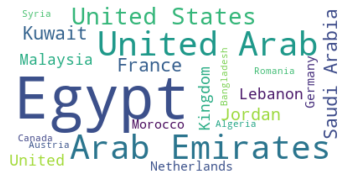

cluster 3


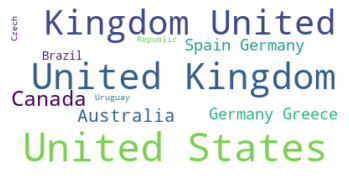

cluster 4


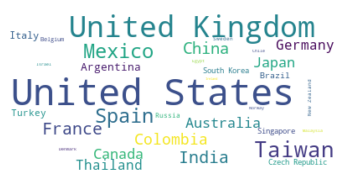

cluster 5


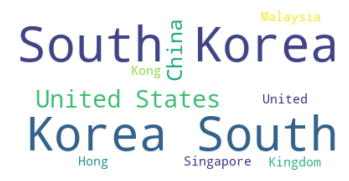

cluster 6


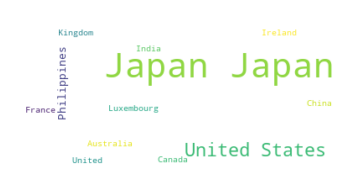

In [84]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

##### **Word Cloud on "listed_in (genre)" column for different cluster**

cluster 0


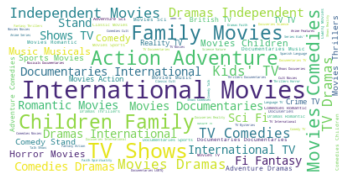

cluster 1


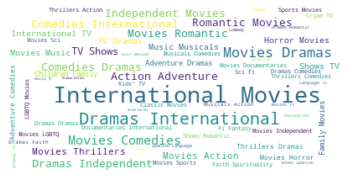

cluster 2


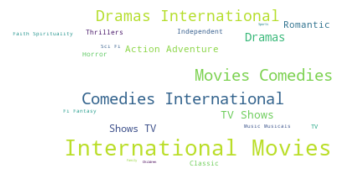

cluster 3


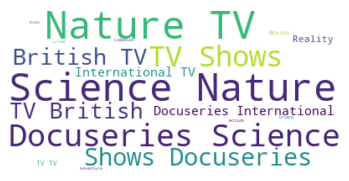

cluster 4


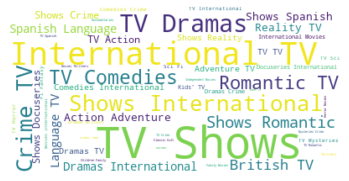

cluster 5


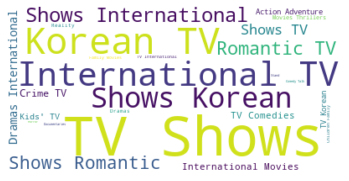

cluster 6


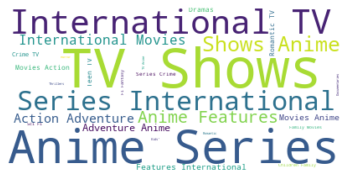

In [85]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

## **8. Content based recommender system**

- We can build a simple content based recommender system based on the similarity of the movie/shows.
- If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
- To get the similarity score of the shows, we can use cosine similarity.
- The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value. We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [86]:
# veryfying index
df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                    07:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7782  lebanon civil war depriv zozo famili hes left ...  
7783  scrappi poor boy worm way tycoon dysfunct fami...  
7784  documentari south african rapper nasti c hit s...  
7785  dessert wizard adriano zumbo look next “willi ...  
7786  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

- As you can see above dataframe there are total 7770 rows present in our dataframe and it show last index as 7786 because of dropping some of the rows while treating null values.

- In order to build content based recommendation system we find out similarity score on the basis of specific index_id with respect to that specific "tags" column.

- If we can't reset the index there is highly chances that we calculate cosine similarity for another one index instead of that we provide index. In order to avoid this problem and address index properly while building recommandation system. We simply reset the index.

In [87]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                    07:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7765  lebanon civil war depriv zozo famili hes left ...  
7766  scrappi poor boy worm way tycoon dysfunct fami...  
7767  documentari south african rapper nasti c hit s...  
7768  dessert wizard adriano zumbo look next “willi ...  
7769  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

- As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system.

In [88]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [89]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zero'].index[0]}")

before reset index id for movie 'Zero' : 7764
after reset index id for movie 'Zero': 7747


In [90]:
# calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 1.64742233e-01, -1.87655923e-04,  5.34958102e-03, ...,
        -1.21969599e-02,  1.06945648e-02,  1.71035621e-02],
       [-4.39211529e-02, -1.25624308e-02, -1.14067434e-02, ...,
        -8.69847009e-05,  8.00182291e-03,  1.77403799e-02],
       [-4.18023741e-02, -4.18474765e-02,  4.23545902e-02, ...,
        -3.52174629e-03, -1.58882269e-03, -8.01741173e-03],
       ...,
       [-7.27563432e-02, -1.75690663e-02, -7.36613846e-02, ...,
         8.93122437e-03,  2.26246291e-03,  4.61749945e-03],
       [ 6.92416158e-02,  3.69104019e-02, -2.52567753e-02, ...,
         5.98188823e-03,  1.78872536e-03, -5.29172299e-03],
       [-6.17251715e-02,  1.90419151e-01, -1.53007986e-01, ...,
         5.17200214e-03, -1.59377551e-03,  7.15511810e-03]])

In [91]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.00000000e+00,  9.40082706e-02,  2.35886934e-02, ...,
        -2.09843595e-02,  8.90220791e-03, -2.07437246e-02],
       [ 9.40082706e-02,  1.00000000e+00, -1.14212966e-03, ...,
         7.56373605e-02, -8.18833393e-03, -1.15346558e-02],
       [ 2.35886934e-02, -1.14212966e-03,  1.00000000e+00, ...,
         8.47001471e-04, -9.78865397e-03, -1.29282863e-02],
       ...,
       [-2.09843595e-02,  7.56373605e-02,  8.47001471e-04, ...,
         1.00000000e+00, -1.17229657e-02,  5.60459082e-02],
       [ 8.90220791e-03, -8.18833393e-03, -9.78865397e-03, ...,
        -1.17229657e-02,  1.00000000e+00,  4.20188386e-02],
       [-2.07437246e-02, -1.15346558e-02, -1.29282863e-02, ...,
         5.60459082e-02,  4.20188386e-02,  1.00000000e+00]])

#### **Function for list down top 10 recommended movie on the basis of cosine similarity score.**

In [92]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [93]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 

Naruto Shippuden: The Movie
Naruto Shippûden the Movie: Bonds
Naruto Shippuden : Blood Prison
Naruto the Movie 2: Legend of the Stone of Gelel
Naruto Shippûden the Movie: The Will of Fire
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
Naruto Shippuden: The Movie: The Lost Tower
DRIFTING DRAGONS
Dino Girl Gauko
Marvel Anime: Wolverine


In [94]:
recommend('Our Planet')

If you liked 'Our Planet', you may also enjoy: 

Nature's Great Events: Diaries
Nature's Great Events (2009)
Nature's Weirdest Events
Blue Planet II
Planet Earth II
The Making of Frozen Planet
Life Story
Night on Earth
Moving Art
The Hunt


In [95]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 

Bhool Bhulaiyaa
Thank You
Golmaal: Fun Unlimited
Bhagam Bhag
Ready
Chup Chup Ke
Khushi
Hattrick
Life in a ... Metro
Hasee Toh Phasee


## **9. Conclusion**

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
- The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
- It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.
- It was decided to **cluster the data based on the attributes: director, cast, country, genre, rating and description**. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
- Through **TFIDF Vectorization, we created a total of 10000 attributes**.
- We used **Principal Component Analysis (PCA) to handle the curse of dimensionality**. **3000 components were able to capture more than 80% of variance**, and hence, the number of components were restricted to 3000.
- We first built clusters using the **K-Means Clustering** algorithm, and the **optimal number of clusters came out to be 5**. This was obtained through the **elbow method and Silhouette score** analysis.
- Then clusters were built using the **Agglomerative clustering** algorithm, and the **optimal number of clusters came out to be 7**. This was obtained after visualizing the **dendrogram**.
- A **content based recommender system** was built using the similarity matrix obtained after using **cosine similarity**. This recommender system will make 10 recommendations to the user based on the type of show they watched.